<img style="float: middle; padding-right: 10px; width: 250px" src="images/parrotai.PNG">

##  Data Science Foundation: Logistic Regression


**College of Informatics and Virtual Education**<br/>
**IPT FIRST YEAR PROGRAM**<br/>
**Instructors**: Davis David

## LOAN PREDICTION PROBLEM

### 1. Understand Problem Statement 
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

#### Type of the Problem 
It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

### 2. Hypothesis Generation 

This is a very important stage in any data science pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

- Salary: Applicants with high income should have more chances of loan approval.
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


### 3. Load packages 

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

### Data
For this practice problem, we have been given one CSV file: loans_dataset.


#### Reading the Data 

In [2]:
data = pd.read_csv("data/loans_data.csv")

Let’s make a copy of the  data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [3]:
data_original = data.copy()

#### Understanding the Data 

In [4]:
#show features represented in the train dataset
for column in data.columns:
    print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


<img src="images/Data column Description.PNG" /> 

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the dataset.

In [5]:
# Print data types for each variable
data.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# shape of the dataset 
data.shape

(614, 13)

We have 614 rows and 13 columns in the dataset

In [7]:
#show the first 5 rows of the dataset
data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 4. Exploratory Data Analysis (EDA) and Data PreProcessing  

#### A.Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

##### Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [8]:
# Frequency table of a variable will give us the count of each category in that variable.
data['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
data['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

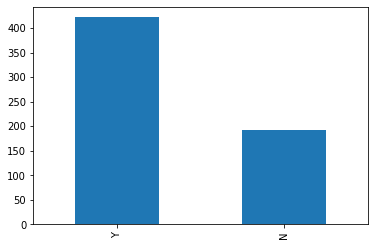

In [10]:
# plot a bar graph for loan_status
data['Loan_Status'].value_counts().plot.bar()

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status, Education, Property_Area)
- Ordinal features: Variables in categorical features having some order involved (Dependents)
- Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

#### Independent Variable (Categorical)

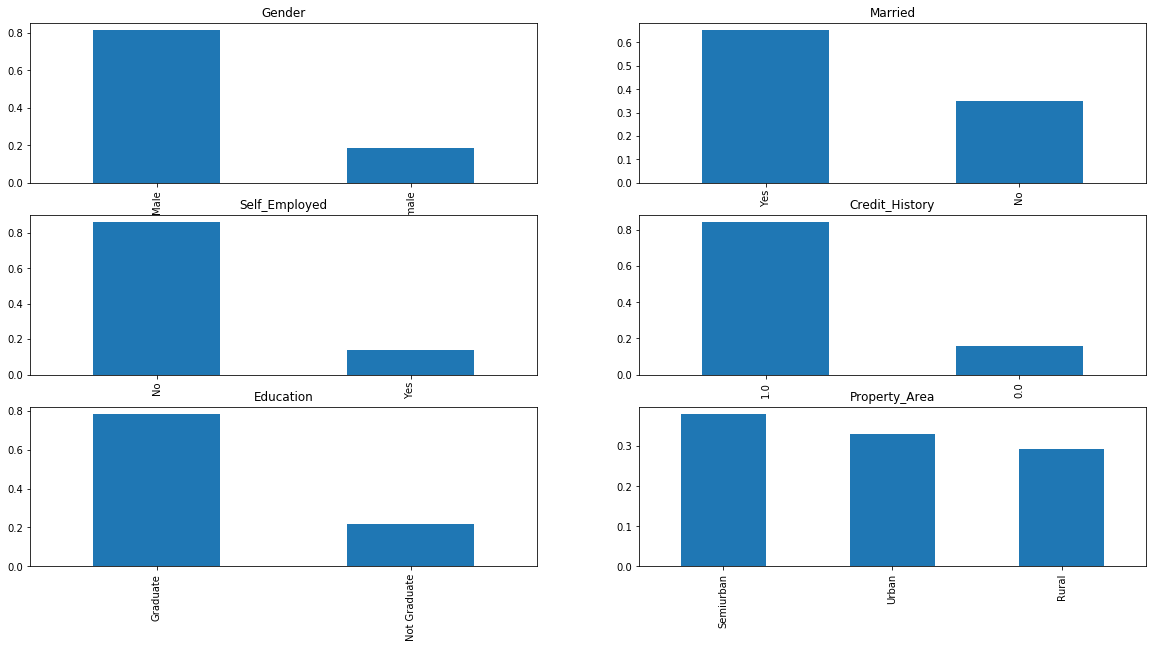

In [11]:
plt.figure(1)
plt.subplot(321)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(322)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(323)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(324)
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(325)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(326)
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

Now let’s visualize the ordinal variables.

#### Independent Variable (Ordinal)

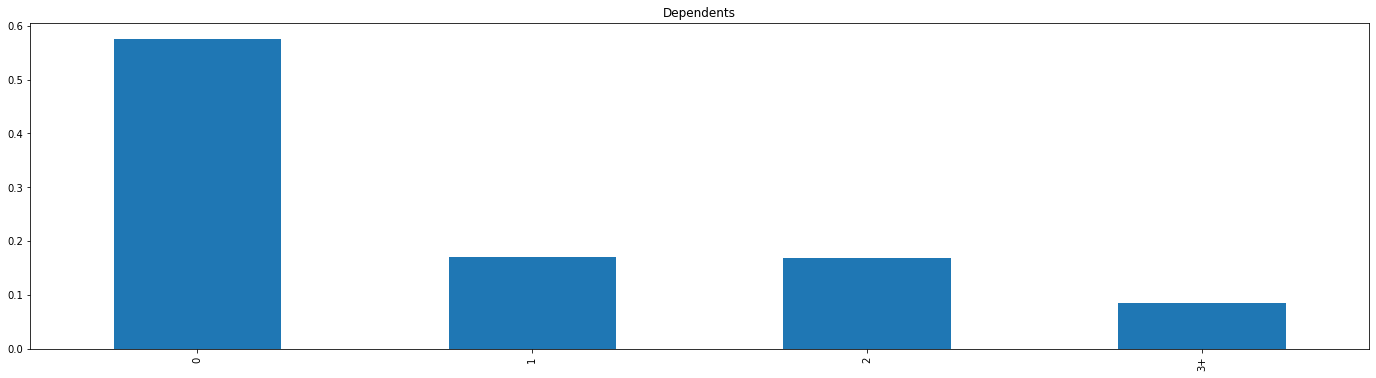

In [12]:
plt.figure(1)
plt.subplot(111)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')
plt.show()

Following inferences can be made from the above bar plot:

- Most of the applicants don’t have any dependents.
 

#### Independent Variable (Numerical)
Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

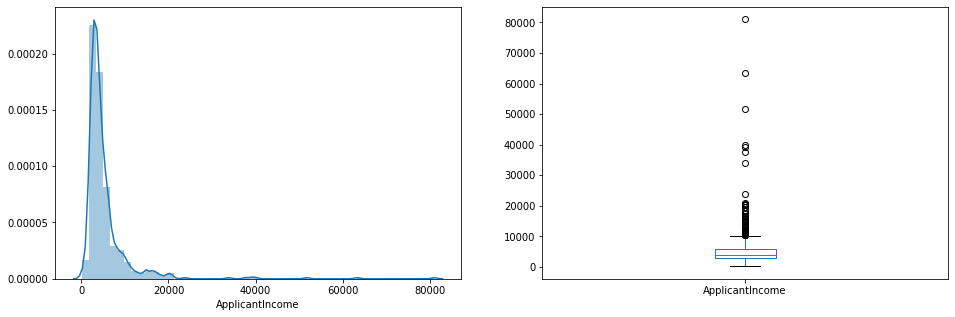

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['ApplicantIncome']);

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

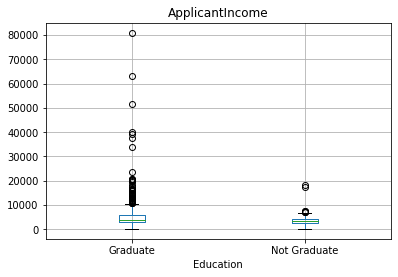

In [14]:
data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("") 

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

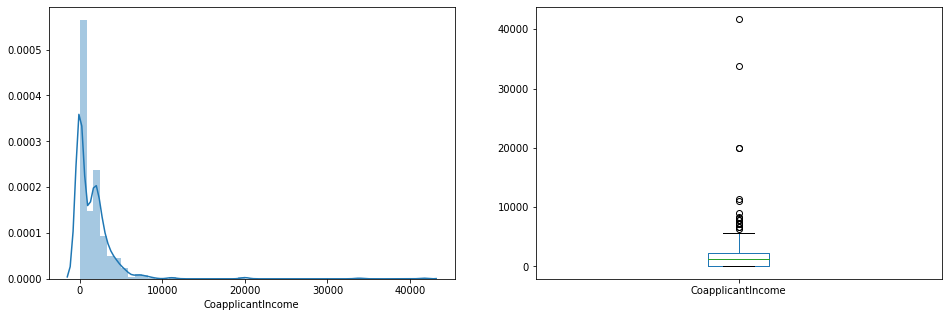

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['CoapplicantIncome']);

plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

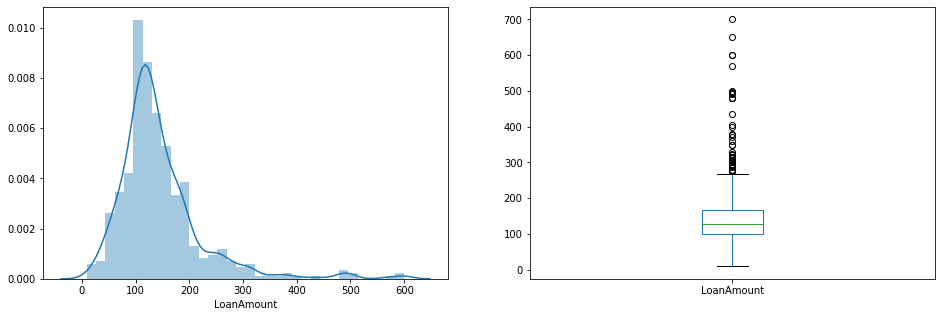

In [16]:
plt.figure(1)
plt.subplot(121)
df=data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

#### B.Bivariate Analysis 

Lets recall some of the hypotheses that we generated earlier:

- Applicants with high income should have more chances of loan approval.
- Applicants who have repaid their previous debts should have higher chances of loan approval.
- Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

#### Categorical Independent Variable vs Target Variable
First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

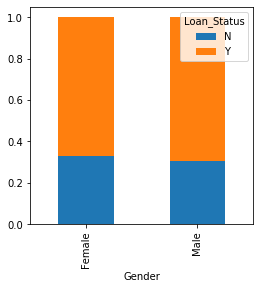

In [17]:
Gender = pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

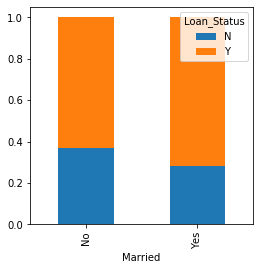

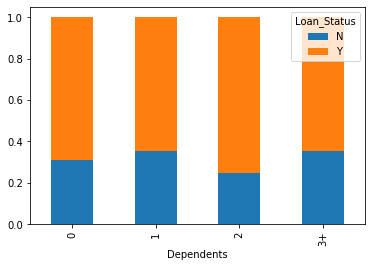

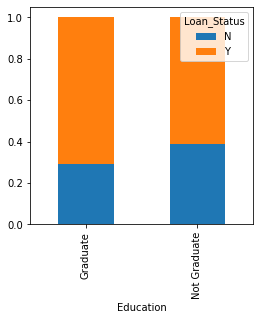

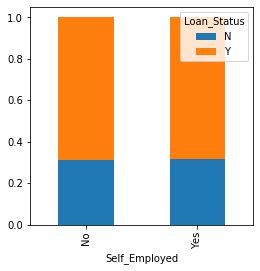

In [18]:
Married=pd.crosstab(data['Married'],data['Loan_Status'])

Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])

Education=pd.crosstab(data['Education'],data['Loan_Status'])

Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

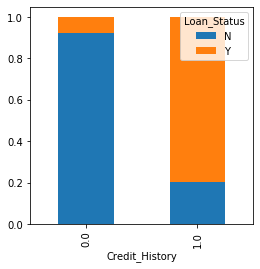

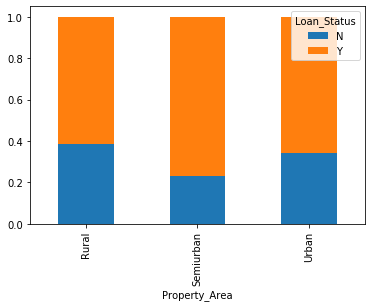

In [19]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])

Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

#### Numerical Independent Variable vs Target Variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved

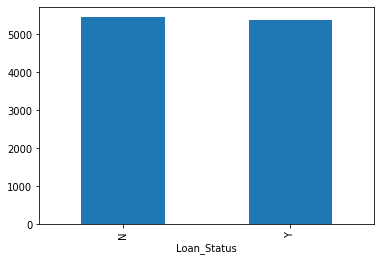

In [20]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar() 

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [21]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)  

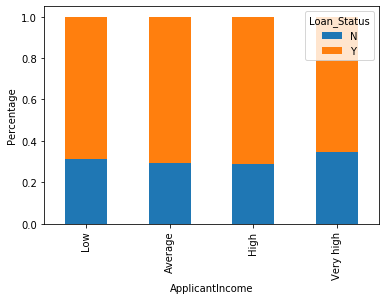

In [22]:
Income_bin = pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage') 

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

In [23]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

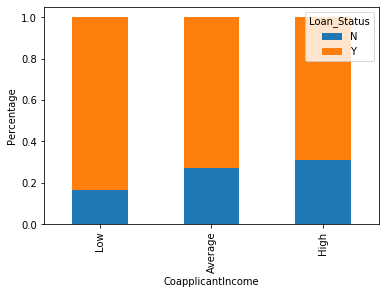

In [24]:
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.

Let’s visualize the Loan amount variable.

In [25]:
bins=[0,100,200,700]
group=['Low','Average','High']
data['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

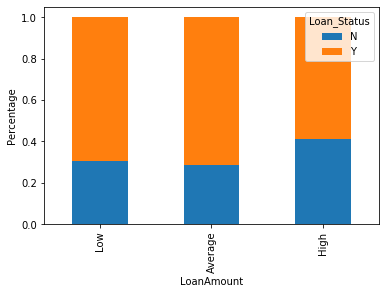

In [26]:
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [27]:
data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis=1)

In [28]:
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

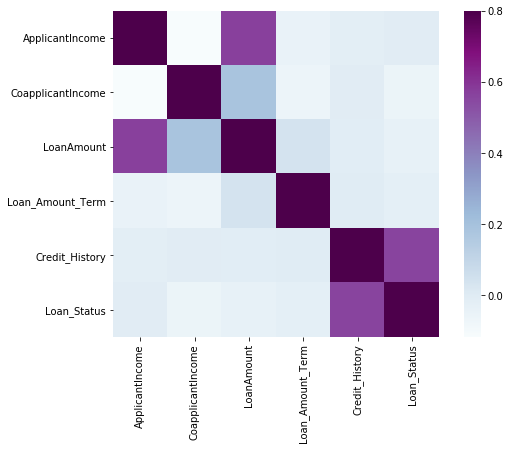

In [29]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### 5.Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

##### Missing value imputation
Let’s list out feature-wise count of missing values.

In [30]:
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [31]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

 Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [32]:
data['Loan_Amount_Term'].value_counts() 

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [33]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [34]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [35]:
data.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. 

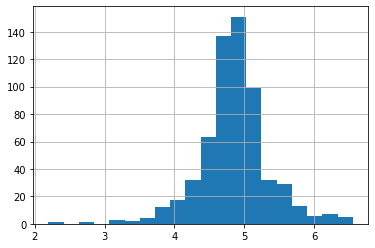

In [36]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions

## 6.Model Building : Part I 

Let us make our first model to predict the target variable. We will use Logistic Regression which is used for predicting binary outcome.

Lets drop the Loan_ID variable as it do not have any effect on the loan status. 

In [37]:
data = data.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [38]:
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

- Consider the “Gender” variable. It has two classes, Male and Female.
- As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and - Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male. 

In [39]:
X=pd.get_dummies(X)

We will split our dataset into train and validation part so that we can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part.

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [40]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size =0.2, random_state =42)

The dataset has been divided into training and validation part. Let us import K-nearest-Neighbors and accuracy_score from sklearn and fit the logistic regression model.

In [41]:
from sklearn import neighbors 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve 

In [45]:
#create different KNeigbhborsClassifier with different number of neighbors 
knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn9 = neighbors.KNeighborsClassifier(n_neighbors=9)

#train the model
knn1.fit(x_train,y_train) 
knn3.fit(x_train,y_train) 
knn5.fit(x_train,y_train) 
knn7.fit(x_train,y_train) 
knn9.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

Let’s predict the Loan_Status for validation set and calculate its accuracy

In [46]:
knn1_preds = knn1.predict(x_val) 
knn3_preds = knn3.predict(x_val) 
knn5_preds = knn5.predict(x_val) 
knn7_preds = knn7.predict(x_val)
knn9_preds = knn9.predict(x_val)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [50]:
print("{} - score = {}".format("knn1",accuracy_score(y_val,knn1_preds)))
print("{} - score = {}".format("knn3",accuracy_score(y_val,knn3_preds)))
print("{} - score = {}".format("knn5",accuracy_score(y_val,knn5_preds)))
print("{} - score = {}".format("knn7",accuracy_score(y_val,knn7_preds)))
print("{} - score = {}".format("knn9",accuracy_score(y_val,knn9_preds)))

knn1 - score = 0.5853658536585366
knn3 - score = 0.6178861788617886
knn5 - score = 0.5772357723577236
knn7 - score = 0.5853658536585366
knn9 - score = 0.5772357723577236


So our predictions show that KNN with K value of 3 perform well with a score of 61.7% compared to other KNN models

Now let's use other known Evaluation Metrics

### Confusion Matrix

In [51]:
 confusion_matrix(y_val,knn3_preds)

array([[ 9, 34],
       [13, 67]], dtype=int64)

Let plot a graph to get clear results

In [52]:
import itertools 

# A function to draw confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fig_num=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if fig_num is not None:
        plt.subplot(2,2,fig_num)
    fmt =   'd'
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.title("")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




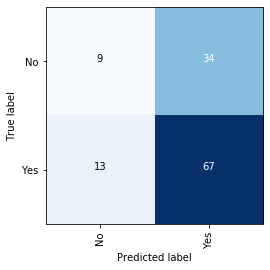

In [53]:
# Plot non-normalized confusion matrix
class_names  = ["No",'Yes']
plot_confusion_matrix(y_val, knn3_preds, classes=class_names,
                      title='Confusion matrix for Logistric Regression Model')

From the diagram we can see that
- only 9 were predicted correct as "No"  and only 13 were predicted as Yes in "No" category
- 67 were predicted correct as "Yes" and only 34 were predicted as "No" in "Yes" category 

### F1 score 

In [61]:
f1_score(y_val,knn3_preds)

0.7403314917127072

Our F1 score value is 0.740 which is not far from  1,this means our knn3 model perform well in prediction but it can be improved.

### ROC CURVE

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [62]:
roc_auc_score(y_val, knn3_preds)

0.5234011627906977

Our Roc auc score value is 0.523 which is closer to 1,this means our knn3 model needs to be  improved.

Text(0.5, 1.0, 'ROC Curve for the Logistic Regression Model')

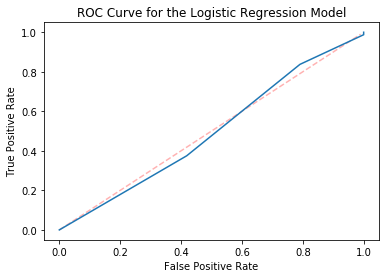

In [63]:
#ROC curve on the val set

# keep probabilities for the positive outcome only
y_proba = knn3.predict_proba(x_val)[:,1]

fpr, tpr, thresholds = roc_curve(np.array(y_val) , y_proba)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="red",alpha=0.3)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for the Logistic Regression Model")

In [64]:
fpr 

array([0.        , 0.41860465, 0.79069767, 1.        , 1.        ])

In [65]:
tpr 

array([0.    , 0.375 , 0.8375, 0.9875, 1.    ])

In [66]:
# save the model in the models directory 
from sklearn.externals import joblib

filename = "data/KNN_model.pkl"

joblib.dump(knn3, filename)

['data/KNN_model.pkl']